<center>
    <h1> KAGGLE CASES, Summer 2019 </h1>
    <h1> Project - 3 </h1>
    <h1> Name : Dhivya Swaminathan </h1>
    <h1> UID : 2000434729 </h1>
    <h2> Multi Class Classification - Ghosts, Ghouls and Goblins </h2>
<center>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train

,id,bone_length,rotting_flesh,hair_length,has_soul,color,type
0,0,0.354512,0.350839,0.465761,0.781142,clear,Ghoul
1,1,0.575560,0.425868,0.531401,0.439899,green,Goblin
2,2,0.467875,0.354330,0.811616,0.791225,black,Ghoul
3,4,0.776652,0.508723,0.636766,0.884464,black,Ghoul
4,5,0.566117,0.875862,0.418594,0.636438,green,Ghost
5,7,0.405680,0.253277,0.441420,0.280324,green,Goblin
6,8,0.399331,0.568952,0.618391,0.467901,white,Goblin
7,11,0.516224,0.536429,0.612776,0.468048,clear,Ghoul
8,12,0.314295,0.671280,0.417267,0.227548,blue,Ghost
9,19,0.280942,0.701457,0.179633,0.141183,white,Ghost


In [4]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(train['type'])
train['class'] = le.transform(train['type'])
list(le.classes_)

['Ghost', 'Ghoul', 'Goblin']

In [5]:
train_data = train.drop(['id','type'], axis=1)
train_data

,bone_length,rotting_flesh,hair_length,has_soul,color,class
0,0.354512,0.350839,0.465761,0.781142,clear,1
1,0.575560,0.425868,0.531401,0.439899,green,2
2,0.467875,0.354330,0.811616,0.791225,black,1
3,0.776652,0.508723,0.636766,0.884464,black,1
4,0.566117,0.875862,0.418594,0.636438,green,0
5,0.405680,0.253277,0.441420,0.280324,green,2
6,0.399331,0.568952,0.618391,0.467901,white,2
7,0.516224,0.536429,0.612776,0.468048,clear,1
8,0.314295,0.671280,0.417267,0.227548,blue,0
9,0.280942,0.701457,0.179633,0.141183,white,0


In [6]:
one_hot = pd.get_dummies(train_data['color'])
y = train_data['class']
has_soul = train_data['has_soul']
train_data = train_data.drop(['color','class','has_soul'],axis = 1)
one_hot = one_hot.join(pd.DataFrame(y))
one_hot = one_hot.join(pd.DataFrame(has_soul))
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train_data)
train_data = pd.DataFrame(scaler.transform(train_data), index=train_data.index, columns=train_data.columns)
train_data = train_data.join(one_hot)
train_data

,bone_length,rotting_flesh,hair_length,black,blood,blue,clear,green,white,class,has_soul
0,0.388217,0.304922,0.382668,0,0,0,1,0,0,1,0.781142
1,0.680620,0.394586,0.458518,0,0,0,0,1,0,2,0.439899
2,0.538175,0.309094,0.782316,1,0,0,0,0,0,1,0.791225
3,0.946626,0.493602,0.580270,1,0,0,0,0,0,1,0.884464
4,0.668128,0.932355,0.328164,0,0,0,0,1,0,0,0.636438
5,0.455902,0.188330,0.354541,0,0,0,0,1,0,2,0.280324
6,0.447503,0.565579,0.559037,0,0,0,0,0,1,2,0.467901
7,0.602130,0.526712,0.552549,0,0,0,1,0,0,1,0.468048
8,0.335018,0.687867,0.326631,0,0,1,0,0,0,0,0.227548
9,0.290898,0.723931,0.052037,0,0,0,0,0,1,0,0.141183


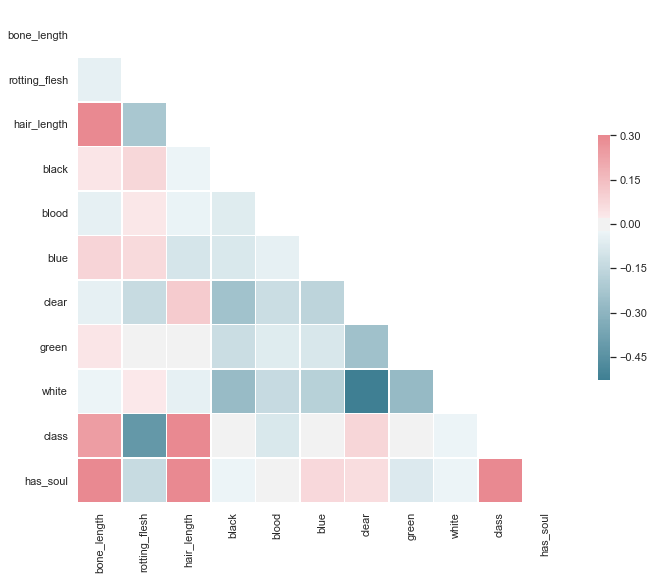

In [7]:
# Correlation plot using seaborn
from string import ascii_letters
import seaborn as sns
sns.set(style="white")

# Compute the correlation matrix
corr = train_data.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [8]:
corr

,bone_length,rotting_flesh,hair_length,black,blood,blue,clear,green,white,class,has_soul
bone_length,1.000000,-0.041716,0.353881,0.036206,-0.042314,0.083212,-0.041600,0.036764,-0.029831,0.241092,0.381675
rotting_flesh,-0.041716,1.000000,-0.220353,0.076409,0.030361,0.067218,-0.130895,0.012733,0.027047,-0.416404,-0.132051
hair_length,0.353881,-0.220353,1.000000,-0.023958,-0.031920,-0.092289,0.111772,0.006113,-0.042936,0.397011,0.474835
black,0.036206,0.076409,-0.023958,1.000000,-0.064443,-0.081892,-0.243719,-0.125939,-0.269704,-0.020063,-0.026948
blood,-0.042314,0.030361,-0.031920,-0.064443,1.000000,-0.042477,-0.126415,-0.065324,-0.139893,-0.080367,0.006069
blue,0.083212,0.067218,-0.092289,-0.081892,-0.042477,1.000000,-0.160642,-0.083010,-0.177770,0.008940,0.071343
clear,-0.041600,-0.130895,0.111772,-0.243719,-0.126415,-0.160642,1.000000,-0.247047,-0.529061,0.081449,0.058060
green,0.036764,0.012733,0.006113,-0.125939,-0.065324,-0.083010,-0.247047,1.000000,-0.273388,-0.020080,-0.070514
white,-0.029831,0.027047,-0.042936,-0.269704,-0.139893,-0.177770,-0.529061,-0.273388,1.000000,-0.027354,-0.027287
class,0.241092,-0.416404,0.397011,-0.020063,-0.080367,0.008940,0.081449,-0.020080,-0.027354,1.000000,0.353404


In [9]:
X = train_data.drop(['class'], axis=1)
y = train_data['class']
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.20, random_state=10)

In [10]:
# A function to fit the model and print test accuracies
def modelfit(alg, dtrain, dy, dtest, dytest):
    #Fit the algorithm on the data
    alg.fit(dtrain, dy)
        
    #Predict training set:
    dtest_predictions = alg.predict(dtest)
    
    #Print model report:
    print("\nModel Report")
    print("Accuracy : %.4g" % metrics.accuracy_score(dytest, dtest_predictions))

In [11]:
import sklearn.linear_model as sk
from sklearn import svm
from sklearn.model_selection import train_test_split
import sklearn.tree as tree
import sklearn.ensemble as en
import sklearn.preprocessing as skp
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, classification_report
from sklearn import model_selection

In [12]:
# Baseline model 1 - K-Nearest Neighbours with Default parameters
knn = KNeighborsClassifier()
modelfit(knn, Xtrain, ytrain, Xtest, ytest)


Model Report
Accuracy : 0.7333


In [13]:
# Baseline model 2 - Logisitic regression with default parameters
lm = sk.LogisticRegression()
modelfit(lm, Xtrain, ytrain, Xtest, ytest)


Model Report
Accuracy : 0.7067


C:\Users\dswaminathan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dswaminathan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [14]:
# Baseline model 3 - Adaboost with Default parameters
ada = en.AdaBoostClassifier()
modelfit(ada, Xtrain, ytrain, Xtest, ytest)


Model Report
Accuracy : 0.7333


In [15]:
# Baseline model 4 - RandomForest with Default parameters
rf = en.RandomForestClassifier()
modelfit(rf, Xtrain, ytrain, Xtest, ytest)


Model Report
Accuracy : 0.7467


C:\Users\dswaminathan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [16]:
# Baseline model 5 - Gradient boosting with Default parameters
gbm = en.GradientBoostingClassifier()
modelfit(gbm, Xtrain, ytrain, Xtest, ytest)


Model Report
Accuracy : 0.6533


### Tuning Adaboost Regression

In [17]:
Xtrain2 = Xtrain
Xtest2 = Xtest

Accuracy of the Adaboost on test set: 0.733
              precision    recall  f1-score   support

           0       0.87      0.77      0.82        26
           1       0.76      0.81      0.79        27
           2       0.57      0.59      0.58        22

   micro avg       0.73      0.73      0.73        75
   macro avg       0.73      0.72      0.73        75
weighted avg       0.74      0.73      0.74        75



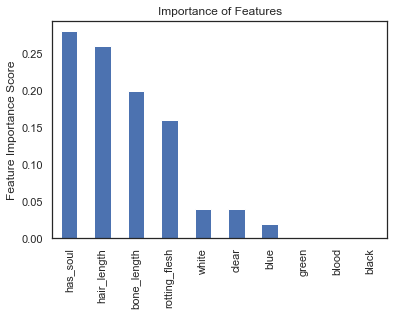

In [18]:
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

baseline = en.AdaBoostClassifier()
baseline.fit(Xtrain2,ytrain)
predictors=list(Xtrain2)
feat_imp = pd.Series(baseline.feature_importances_, predictors).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Importance of Features')
plt.ylabel('Feature Importance Score')
print('Accuracy of the Adaboost on test set: {:.3f}'.format(baseline.score(Xtest2, ytest)))
pred=baseline.predict(Xtest2)
print(classification_report(ytest, pred))

In [19]:
# optimising learning rate and n_estimators
p_test3 = {'learning_rate':[0.4,0.35,0.3,0.25,0.2,0.15,0.1], 'n_estimators':[1250,1500,2000,2500,3000,3500]}

tuning = GridSearchCV(estimator = en.AdaBoostClassifier(), 
            param_grid = p_test3, scoring='accuracy',n_jobs=4,iid=False, cv=5)
tuning.fit(Xtrain2,np.array(ytrain).ravel())
tuning.cv_results_, tuning.best_params_, tuning.best_score_

In [20]:
# Baseline model 4 - Adaboost with Tuned parameters
ada = en.AdaBoostClassifier(learning_rate=0.3, n_estimators=3000)
modelfit(ada, Xtrain, ytrain, Xtest, ytest)


Model Report
Accuracy : 0.7467


In [22]:
def process_and_scale_test_data(data):
    test_data = data.drop(['id'], axis=1)
    one_hot = pd.get_dummies(test_data['color'])
    has_soul = test_data['has_soul']
    test_data = test_data.drop(['color','has_soul'],axis = 1)
    one_hot = one_hot.join(pd.DataFrame(has_soul))
    scaler = MinMaxScaler()
    scaler.fit(test_data)
    test_data = pd.DataFrame(scaler.transform(test_data), index=test_data.index, columns=test_data.columns)
    test_data = test_data.join(one_hot)
    return test_data

In [23]:
test_data = process_and_scale_test_data(test)
test_data

,bone_length,rotting_flesh,hair_length,black,blood,blue,clear,green,white,has_soul
0,0.471774,0.387937,0.706199,1,0,0,0,0,0,0.698537
1,0.427332,0.645024,0.565648,0,0,0,0,0,1,0.451462
2,0.549602,0.491931,0.660493,1,0,0,0,0,0,0.449809
3,0.638095,0.682867,0.471484,0,0,0,0,0,1,0.356924
4,0.361762,0.583997,0.377317,1,0,0,0,0,0,0.276364
5,0.292890,0.505851,0.297974,0,0,0,0,0,1,0.106263
6,0.584456,0.551680,0.628430,0,0,0,0,0,1,0.499118
7,0.485525,0.459242,0.657839,0,0,1,0,0,0,0.565337
8,0.471757,0.407916,0.466066,0,0,1,0,0,0,0.406608
9,0.572953,0.316454,0.668495,0,0,0,1,0,0,0.640692


In [34]:
from sklearn.ensemble import VotingClassifier

voting_classifier = VotingClassifier(estimators=[('rf', rf), ('gbm', gbm), ('lr', lm), 
                                                 ('ada', ada), ('knn', knn)], voting='hard')
voting_classifier.fit(Xtrain, ytrain)
modelfit(voting_classifier, Xtrain, ytrain, Xtest, ytest)

C:\Users\dswaminathan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dswaminathan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\dswaminathan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dswaminathan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.


Model Report
Accuracy : 0.7467


In [35]:
res = voting_classifier.predict(test_data)
preds = le.inverse_transform(res)

In [36]:
output = pd.DataFrame({'id':test['id'], 'type':preds})
output.to_csv('C:/Users/dswaminathan/Documents/My Tableau Repository/others/Project 3/submission.csv', index=False)